In [15]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.figure import Figure
import typing as tp

        

class YouTube:
    def __init__(self, path_to_df: str = "RUvideos_short.csv"):
        self.df = pd.read_csv(path_to_df)
    def centred(self) -> pd.DataFrame:
        likes_mean = self.df.likes.mean()
        veiws_mean = self.df.views.mean()
        upper_quantile = self.df[self.df.likes >= likes_mean * 0.1]
        upper_quantile = upper_quantile[upper_quantile.likes <= likes_mean * 1.9]
        upper_quantile = upper_quantile[upper_quantile.views >= veiws_mean * 0.1]
        return upper_quantile[upper_quantile.views <= veiws_mean * 1.9]
    def task1(self) -> pd.DataFrame:
        a = self.df
        a.trending_date = pd.to_datetime(self.df.trending_date, format='%y.%d.%m')
        self.df = a
        return a
    def task2(self) -> pd.DataFrame:
        self.df = self.df[['trending_date', 'category_id', 'views', 'likes', 'dislikes', 'comment_count']]
        self.df.trending_date = self.df.trending_date.apply(lambda data: data.day)
        return self.df
    def task3(self) -> Figure:
        with sns.plotting_context(font_scale=1.5), sns.axes_style("darkgrid"):
            sns.boxplot(data = self.df, y='views', x='trending_date')
        plt.title("views")
        return plt.gcf()

    def task4(self) -> Figure:
        plt.title("Views")
        plt.ylim((0, 500000))
        plt.xlabel("days")
        plt.ylabel("views")
        sns.boxplot(data = self.df, y='views', x='trending_date', dodge = True)
        return plt.gcf()    

    def task5(self) -> Figure:
        plt.figure(figsize=(18, 18))
        sns.jointplot(data = self.df, x = 'views', y = 'likes', alpha=0.5)
        plt.xlim((-5000, 50000))
        plt.ylim((600, 15000))
        plt.title("views")
        plt.xlabel("days")
        plt.ylabel("likes")
        return plt.gcf() 

    def task6(self) -> Figure:
        plt.figure(figsize=(25, 18))
        # центральный график
        self.df.likes = (self.df.likes-self.df.likes.min())
        self.df.views = (self.df.views-self.df.views.min())
        d = self.centred()
        g = sns.jointplot(data = d, x = 'views', y = 'likes', alpha=0.5, space = 1)
        
        
        #plt.xlim((0, 0.2*d.views.max()))
        #plt.ylim((0, d.likes.max()))
        plt.title("views and likes")
        plt.xlabel("views")
        plt.ylabel("likes")
        
        return plt.gcf() 

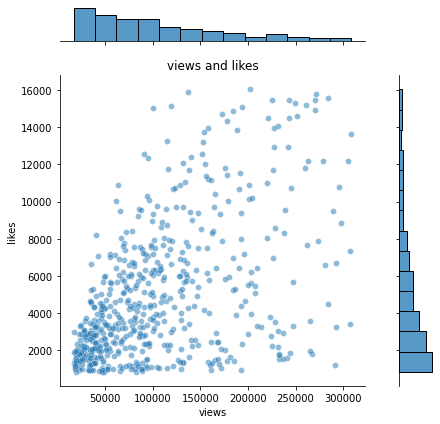

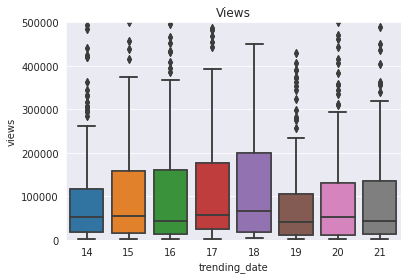

<Figure size 1296x1296 with 0 Axes>

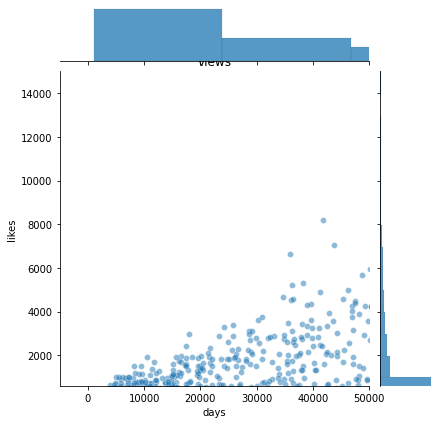

<Figure size 1800x1296 with 0 Axes>

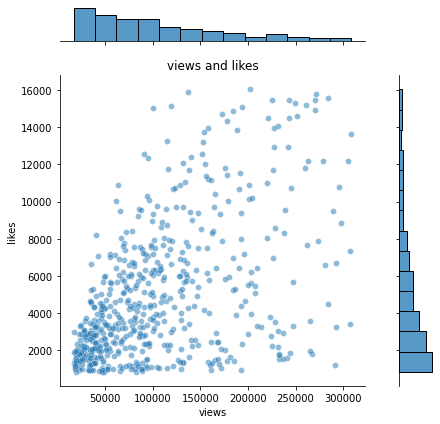

In [16]:
y = YouTube()
#print(y.df.groupby(by = 'trending_date', as_index=False).count())
#print(y.df[1000:1030].trending_date)
y.task1()
y.task2()
y.task3()
y.task4()
y.task5()
y.task6()